![](https://api.brandy.run/core/core-logo-wide)

# Supervised Learning: Multiclass

En la clase pasada hemos visto un problema de clasificación binário, donde para cada predicción solo había 2 valores posibles. Pero el proprio dataset utilizado (MNIST_784) nos indica que ese problema es de otro orden: hay más de 2 posibles clases. Para tal, tenemos que hacer las siguientes consideraciones:

**¿El algoritmo eligido funciona naturalmente con multiples clases?**

¡Hay algoritmos que sí! Estos son compatibles directamente con problemas multiclass. 
- `Random Forrest`, 
- `Logistic Regression`
- `Naive Bayes`

Por otro lado, hay algoritmos que son exclusivamente clasificadores binários, e.g.: 
- `Stochastic Gradient Descent`
- `Support Vector Machine`

Eso no significa que esos algoritmos no sean útiles en la classificación multiclass, apenas que hay que utilizar un sistema o estratégia capaz de convertir esos problemas en una serie de problemas binários.

Hay dos posibles estratégias:

## 1. Estratégia: One vs the Rest ( OvR )

También conocido como `One vs all`.

<img src="img/ovr.png" width="500"/>

Segun esa estratégia, entrenamos n modelos donde n es el numero de clases posibles. Un identificador de 0's, 1's, 2's, etc. Aquél que tenga el valor más significativo en su función clasificadora será la clase predicha.

## 2. Estratégia: One vs One ( OvO )

<img src="img/ovo.png" width="500"/>


En ese caso debemos entrenar un modelo para cada combinación posible de pares de clases. En el caso de los 10 digitos de MNIST, necesitariamos 45 modelos binários. 

## OvR vs OvO

| |OvR|OvO|
|-|---|---|
|# models|n|n*(n-1)/2| 
|training data|whole data for each model|just the 2 relevant clases|

Si usamos modelos que no sean muy escalables en función a la cantidad de datos, debemos utilizar `OvO`, pues será más rápido entrenar más modelos con menos datos cada que entrenar más modelos con muchos (todos) los datos cada. Eso es el caso, por ejemplo, de `Support Vector Machine`.

Para la mayor parte de los algorítmos binários, entretanto, la estratégia `OvR` será preferíble.

## Automatizando Multiclass con Sklearn

Por suerte, sklearn identifica que estamos utilizando uno de los modelos binários para un problema multiclass y aplica una de las estratégias anteriores según el modelo.

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [201]:
# Obtenemos el dataset de mist
X,y = fetch_openml("mnist_784", version=1,return_X_y=True)

print(X.shape)

(70000, 784)


In [202]:
pd.Series(y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [203]:
# Extraemos solo las 20000 primeras imagenes del dataset, para trabajar con menos datos
X_samp, y_samp = X[:20000], y[:20000]

# Dividimos el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp)

Entrenamos un modelo de machine learning, en este caso **Support Vector Machines**

Puedes encontrar más información de este modelo aquí:
* https://www.youtube.com/watch?v=efR1C6CvhmE


In [204]:
%%time
from sklearn.svm import SVC

svc_ovo = SVC(decision_function_shape="ovo")
svc_ovo.fit(X_train, y_train)

CPU times: user 17.7 s, sys: 100 ms, total: 17.8 s
Wall time: 17.8 s


SVC(decision_function_shape='ovo')

In [41]:
%%time
from sklearn.svm import SVC

svc_ovr = SVC(decision_function_shape="ovr")
svc_ovr.fit(X_train, y_train)

CPU times: user 26.1 s, sys: 155 ms, total: 26.3 s
Wall time: 26.5 s


SVC()

In [42]:
y_train[:10]

16812    2
3468     1
13258    8
9729     9
8556     7
1641     8
4608     0
5499     5
19707    9
2255     1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Es el momento de realizar la predicción usando las features de test `X_test` y obtener los resultados multiclass

In [43]:
y_pred = svc_ovo.predict(X_test)
print(y_pred)
print(y_pred.shape)

['4' '5' '4' '2' '1' '5' '7' '2' '1' '5' '1' '4' '2' '2' '6' '7' '2' '2'
 '2' '8']
(5000,)


In [44]:
df = pd.DataFrame({"GT":y_test,"Pred":y_pred, "failure":y_test != y_pred })
print("Fallos",df["failure"].sum())
df

Fallos 169


,GT,Pred,failure
17868,4,4,False
16442,5,5,False
14259,4,4,False
18943,2,2,False
7720,1,1,False
...,...,...,...
663,4,4,False
11549,5,5,False
11990,9,9,False
16972,8,8,False


In [45]:
error = np.sum(y_test != y_pred) / len(y_test) * 100

print(f"El porcentaje de error en el test es del {error}")
print(f"Accuracy {100-error}")

El porcentaje de error en el test es del 3.38
Accuracy 96.62


In [46]:
y_pred_ovr = svc_ovr.predict(X_test)
print(y_pred_ovr)
print(y_pred_ovr.shape)

['4' '5' '4' ... '9' '8' '4']
(5000,)


In [47]:
df = pd.DataFrame({"GT":y_test,"Pred":y_pred_ovr, "failure":y_test != y_pred_ovr })
print("Fallos",df["failure"].sum())
df

Fallos 169


,GT,Pred,failure
17868,4,4,False
16442,5,5,False
14259,4,4,False
18943,2,2,False
7720,1,1,False
...,...,...,...
663,4,4,False
11549,5,5,False
11990,9,9,False
16972,8,8,False


In [49]:
error = np.sum(y_test != y_pred_ovr) / len(y_test) * 100

print(f"El porcentaje de error en el test es del {error}")
print(f"Accuracy {100-error}")

El porcentaje de error en el test es del 3.38
Accuracy 96.62


## Revisando las predicciones

Recordemos que en cualquier problema de supervised learning es muy importante revisar algunos casos para comprobar si la predicción se ha realizado correctamente y poder contrastarla con el groundtruth del dataset.

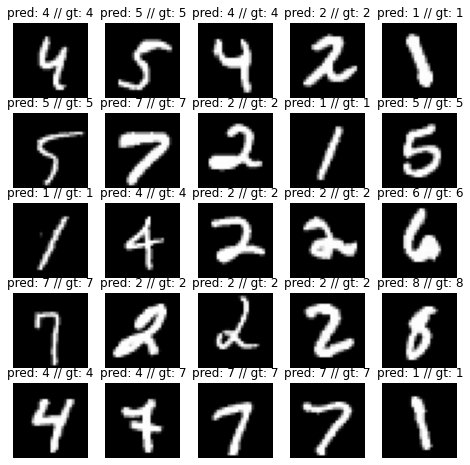

In [50]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test.iloc[i].values.reshape((28,28)), cmap="gray")
    plt.axis("off")
    plt.title(f"pred: {y_pred[i]} // gt: {y_test.iloc[i]}")    

## Matriz de confusión

Una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


[[503   0   0   0   1   1   2   1   0   0]
 [  0 544   2   2   0   1   0   0   3   1]
 [  1   1 438   2   4   0   1   5   6   2]
 [  1   1   3 521   0   7   0   2   4   2]
 [  0   0   1   0 479   0   2   2   0   8]
 [  1   0   1   8   2 401   6   1   4   3]
 [  2   1   0   0   0   2 520   0   2   0]
 [  0   0   3   1   2   0   0 502   0   3]
 [  1   2   3   4   5   0   1   1 454   3]
 [  2   3   1   2   3   1   1   8   7 479]]


<AxesSubplot:title={'center':'Confusion Matrix'}>

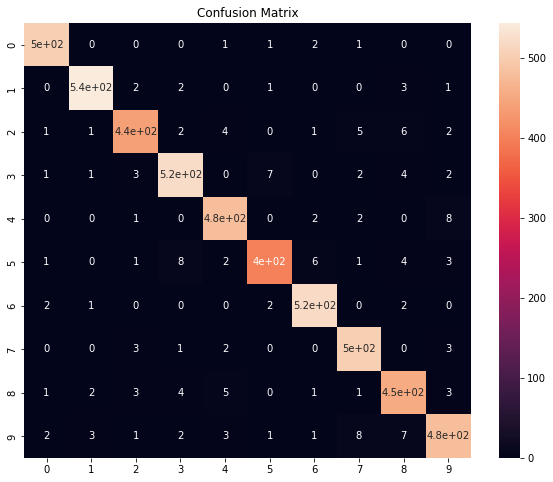

In [20]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión directamente con sklearn
conf = confusion_matrix(y_test, y_pred)
print(conf)

# Usando la libreria seaborn, imprimimos un gráfico con el resultado absuluto.
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix")
sns.heatmap(conf, annot=True)

Para realizar un heatmap mas correcto, podemos poner la diagonal a 0 y ver más facilmente las clases con mayor confusión

<AxesSubplot:title={'center':'Confusion Matrix'}>

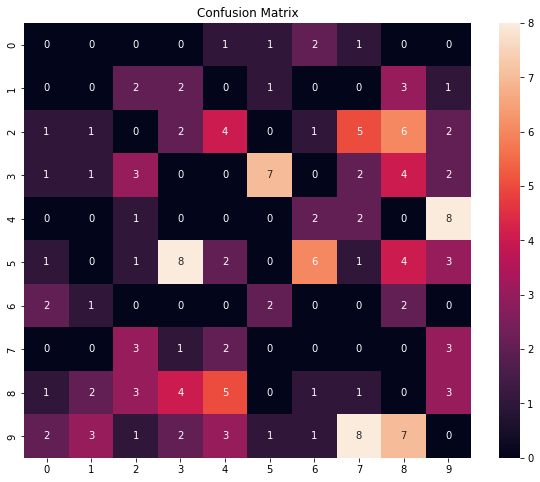

In [17]:
# Inplace operation
np.fill_diagonal(conf,0 )
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix")
sns.heatmap(conf, annot=True)

También podemos realizar una `confusion matrix` que imprima los porcentajes de fallo

<AxesSubplot:title={'center':'Confusion Matrix'}>

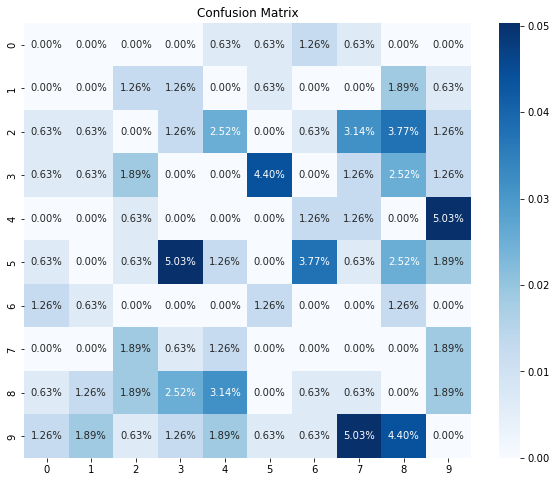

In [18]:
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix")
np.fill_diagonal(conf,0 )
sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues')

Text(0.5, 51.0, 'Predicted')

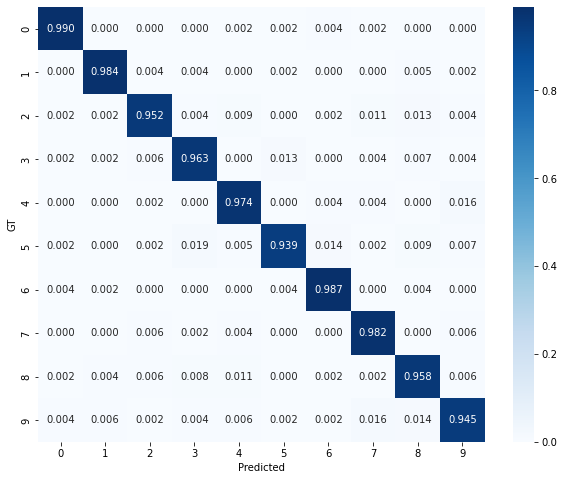

In [33]:
aux=conf
conf_norm = aux/aux.sum(axis=1)[:, np.newaxis]
plt.subplots(figsize=(10,8))
sns.heatmap(conf_norm, annot=True, fmt=".3f",  cmap='Blues')
plt.ylabel("GT")
plt.xlabel("Predicted")

## Métricas en multiclass: Micro vs Macro

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

- `micro`: Calculate metrics globally by counting the total true positives, false negatives and false positives.
- `macro`: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- `weighted`: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.


In [51]:
accuracy_score(y_pred,y_test)

0.9662

In [52]:
precision_score(y_pred,y_test, average="micro")

0.9662

In [53]:
precision_score(y_pred,y_test, average="macro")

0.9662608860888102

In [127]:

# Podemos definir una función que nos calcule automáticamente las métricas
def metrics(model, X, y, average="macro"):
    metrics = {}
    functions = {
        "accuracy": accuracy_score,
        "precision": lambda *args :precision_score(*args, average=average),
        "recall": lambda *args :recall_score(*args, average=average),
        "f1_score": lambda *args :f1_score(*args, average=average),
    }
    y_test = model.predict(X)
    for name, func in functions.items():
        metrics[name] = func(y_test, y)
    return metrics

In [56]:
metrics(svc_ovo,X_train,y_train)

{'accuracy': 0.9874666666666667,
 'precision': 0.987414091257287,
 'recall': 0.9874272739335022,
 'f1_score': 0.9874159095040087}

In [57]:
metrics(svc_ovo,X_test,y_test)

{'accuracy': 0.9662,
 'precision': 0.9662608860888102,
 'recall': 0.9662280569580292,
 'f1_score': 0.9661801967071242}

In [59]:
svc_ovo.decision_function(X_test.iloc[[0]])

array([[-0.03767312, -1.10389985, -1.16595967, -1.51398593, -1.44394109,
        -1.03607885, -1.29339498, -1.45212517, -1.57649653, -0.81842546,
        -1.17126539, -1.98997941, -0.95692139, -0.60833314, -1.13958864,
        -1.55519868, -1.62056851, -0.90023698, -1.56748941, -0.31762264,
        -0.25194397, -0.42639751, -1.41880893, -1.21133854, -1.63606694,
        -0.58334631,  0.38397625, -0.16572226, -0.47185179, -1.27882209,
         1.9288872 ,  1.55683645,  1.77812515,  1.43140728,  1.4648048 ,
         0.65821323, -0.5020067 , -0.43376843, -1.35407623, -0.42311344,
        -0.78734568, -1.09516504, -0.34078956, -1.69370378, -0.9230616 ]])

In [61]:
svc_ovo.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [64]:
svc_ovo.classes_[svc_ovo.decision_function(X_test.iloc[[0]]).argmax()]

IndexError: index 30 is out of bounds for axis 0 with size 10

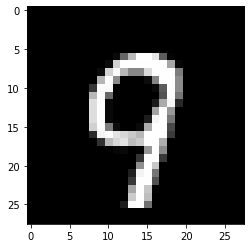

In [45]:
plt.imshow(X_test.iloc[0].values.reshape((28,28)), cmap="gray")

La estratégia OvO fué decidida por defecto por sklearn. Si quisieramos, podríamos utilizar cualquier una de las dos con cualquier modelo.

In [65]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [66]:
model = OneVsRestClassifier(SVC())

In [67]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [68]:
metrics(model)

TypeError: metrics() missing 2 required positional arguments: 'X' and 'y'

In [50]:
y_pred = model.predict(X_test)

In [51]:
conf = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

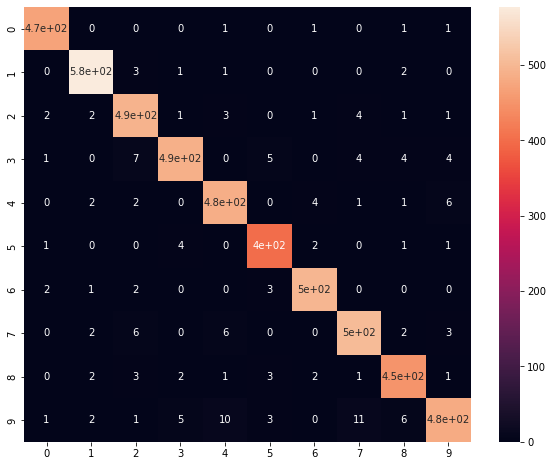

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(conf, annot=True)

## Cross validating

Es importante tener en cuenta que al entrenar un problema de `supervised learning multiclass` también realizemos un cross validation para asegurar que no hay aleatoriedad en el resultado

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier

In [54]:
sgd = SGDClassifier()

In [56]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

array([0.8836, 0.8752, 0.841 ])

## Confusion Matrix

In [57]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [58]:
y_pred=sgd.predict(X_test)

In [59]:
conf = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

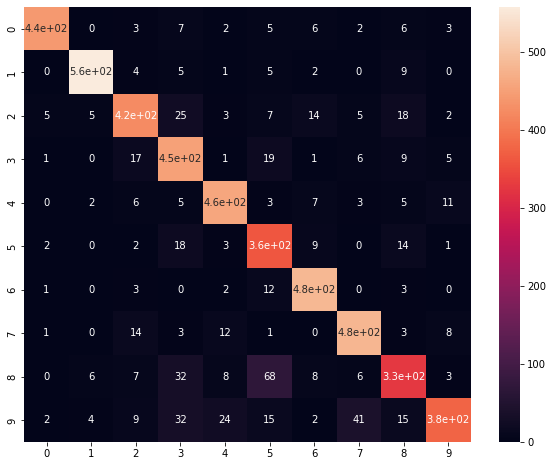

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(conf, annot=True)

In [61]:
# Inplace operation
np.fill_diagonal(conf,0 )

<AxesSubplot:>

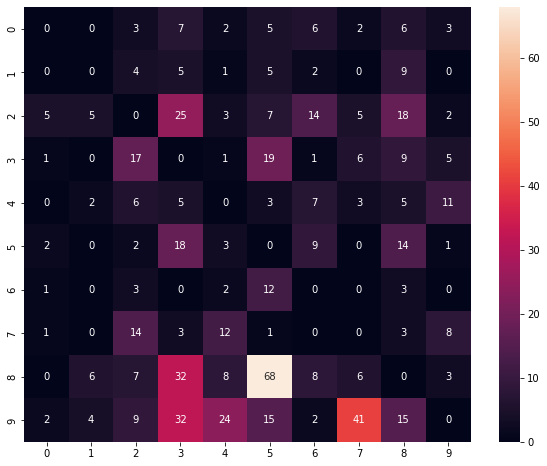

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(conf, annot=True)

# Feature Scaling

El escalado de características es un método utilizado para normalizar el rango de variables independientes o características de los datos. Principalmente se usa para evitar el error numérico producido por entrenar modelos con valores muy grandes o muy pequeños. Debes recordar que en tu ordenador, los numeros decimales no tienen precisión infinita, por eso es importante localizar los datos en un rango que sea facil de operar

<img src="img/scaling.png" width="350" />

### Standard Scaler
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$z = (x - u) / s$$

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler

In [93]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)


In [35]:
datapoint = X_train.iloc[0]

In [36]:
datapoint.describe()

count    784.000000
mean      22.581633
std       67.163748
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 17487, dtype: float64

In [72]:
pd.Series(X_train_scaled[0]).describe()

count    784.000000
mean       0.045184
std        1.112138
min       -1.206352
25%       -0.343784
50%       -0.057091
75%        0.000000
max       15.283000
dtype: float64

## MinMax Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=min%20max%20scaler#sklearn.preprocessing.MinMaxScaler

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# scaler.inverse_transform -> Para dejar los datos como estaban originalmente

In [86]:
X_train.iloc[0].describe()

count    784.000000
mean      34.955357
std       80.294298
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 12629, dtype: float64

In [87]:
pd.Series(X_train_scaled[0]).describe()

count    784.000000
mean       0.137085
std        0.314893
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

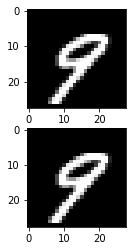

In [91]:
for i, im in enumerate([X_train.iloc[0].values, X_train_scaled[0]]):
    plt.subplot(2,1,i+1)
    plt.imshow(im.reshape((28,28)), cmap="gray")

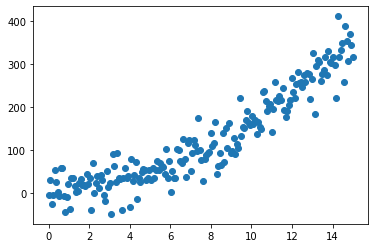

In [92]:
data_x = np.linspace(0,15,200)
data_y =  1.5*data_x**2 + data_x + 7 + np.random.normal(2,35,len(data_x))
plt.scatter(data_x,data_y);

In [93]:
data = pd.DataFrame({"x":data_x,"y":data_y})

In [96]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
data_scal = scaler.fit_transform(data)

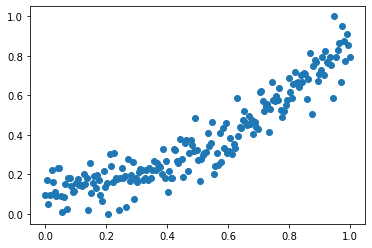

In [97]:
plt.scatter(data_scal[:,0],data_scal[:,1])

## Un ejemplo de cuando es necesario realizar feature scaling

In [99]:
cats = pd.read_csv("data/cat.csv", header=None).T
dogs = pd.read_csv("data/dog.csv", header=None).T

In [100]:
cats.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,64,64,64,64,64,77,77,77,77,77,...,64,64,77,77,64,77,77,64,64,61
1,23,23,20,20,9,9,9,4,4,4,...,108,108,108,108,89,65,51,31,23,9
2,250,250,250,244,244,244,244,244,232,232,...,244,244,244,232,244,244,244,244,232,244
3,137,137,137,144,151,151,151,158,151,151,...,74,89,89,78,78,78,100,102,124,124
4,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,45,37,45,52


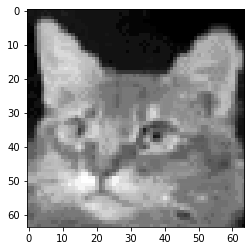

In [102]:
plt.imshow(cats.iloc[1].values.reshape(64,64).T, cmap="gray")

In [104]:
cats.iloc[1].values.reshape(64,64).T+1000

array([[1023, 1023, 1020, ..., 1004, 1004, 1004],
       [1023, 1023, 1020, ..., 1004, 1004, 1004],
       [1020, 1020, 1023, ..., 1004, 1004, 1004],
       ...,
       [1089, 1089, 1108, ..., 1065, 1051, 1031],
       [1108, 1101, 1108, ..., 1051, 1031, 1023],
       [1108, 1108, 1101, ..., 1051, 1031, 1009]])

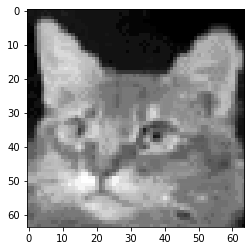

In [113]:
plt.imshow(cats.iloc[1].values.reshape(64,64).T +1000, cmap="gray")

In [117]:
cat = cats.iloc[60].values.reshape((64,64)).T
dog = dogs.iloc[30].values.reshape((64,64)).T

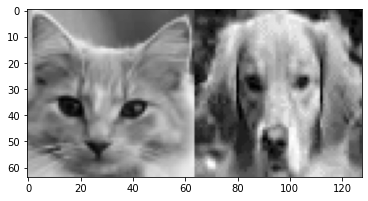

In [121]:
cat_dog = np.concatenate([cat,dog], axis= 1)
plt.imshow(cat_dog, cmap="gray")

In [122]:
cat_1000 = cat + 1000

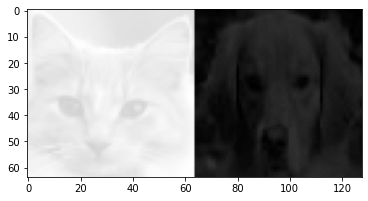

In [125]:
cat_dog = np.concatenate([cat_1000,dog], axis=1)
plt.imshow(cat_dog, cmap="gray")